# Fifa 21 Players Data Analysis in Python.

We have a dataset which contains information about players in FIFA 21. So, it is actually a dataset of the esports category. We got the dataset from Kaagle. The link to the dataset is - (https://www.kaggle.com/aayushmishra1512/fifa-2021-complete-player-data).  We will try to analyze different aspects as much as we can from the dataset we have  and we will be using numpy, pandas,matplotlib and seaborn mainly for the analysis. I learned data analysis from the free course organised by jovian in collaboration with freecodecamp. The link to the course is - (http://zerotopandas.com).

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [1]:
project_name = "fifa_21_players_data_analysis_in_python1"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project='fifa_21_players_data_analysis_in_python1')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sayakpm3/fifa-21-players-data-analysis-in-python1" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1


'https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1'

## Data Preparation and Cleaning

First we have to read the CSV file using Pandas. Sometimes datasets contain many unwanted values or ambiguous values, so we need to clean them up. 
After cleaning the data we will prepare the data as per our use.

In [5]:
import pandas as pd
import numpy as np 

In [6]:
dataraw_df =  pd.read_csv('FIFA 21.csv',delimiter = ';')

In [7]:
dataraw_df

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [8]:
dataraw_df.shape

(17981, 9)

In [9]:
dataraw_df.columns

Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')

In [10]:
dataraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [11]:
dataraw_df.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


The information that we got till now :
The datasets of Fifa 21 contains 9 columns and 17981 rows. Which means that, there are 17981 players in Fifa 21.
The columns contain information like : 'Player id', 'Player Name', 'Player Nationality', 'Position where the player plays', 'Overall rating of the Player', 'Player Age','Player hits', 'Player potential', 'Club for which he plays'
The minimum and maximum overall rating of a player in Fifa 21 is 56 and 94 respectively.
The minimum and maximum age of a player in Fifa 21 is 17 and 43 respectively.

In [12]:
dataraw_df.position.unique()

array(['ST|CF|RW', 'ST|LW', 'CAM|LW', 'CB', 'GK', 'CM|CAM', 'ST', 'ST|RW',
       'LW', 'ST|RW|LW', 'CDM|CM', 'ST|CF|LW', 'CM', 'RW|LW', 'CF', 'CDM',
       'ST|LM', 'ST|CF', 'CM|CAM|RW', 'RB|CDM|CM', 'CAM|CF', 'LM|CF',
       'RM|CM|CAM', 'RM|LM|CAM', 'LB', 'CAM|RW', 'CB|CDM', 'RM|RW',
       'LM|CF|LW', 'RM|LM|CM', 'ST|CAM|CF', 'RB', 'CDM|CM|CAM',
       'ST|RM|CAM', 'LB|LM|CM', 'RM|LM|RW', 'CM|CAM|CF', 'RM|CM',
       'CM|CAM|LW', 'RM|CAM|RW', 'LB|CB', 'RM|CAM', 'RM|LM|LW',
       'LM|CM|CAM', 'CAM|CF|LW', 'LB|LM', 'LM|RW|LW', 'RB|LB|CB', 'RM|LM',
       'ST|CAM', 'LWB|LM|LW', 'LM', 'RM', 'RM|CF|RW', 'RM|LM|CF',
       'RB|RM|RW', 'LB|CB|CDM', 'CAM|RW|LW', 'LM|LW', 'CDM|LM|CM',
       'RB|LB|RM', 'RWB|RB|RW', 'CB|CDM|CM', 'RB|CB', 'LB|LW', 'ST|RM|RW',
       'ST|RM', 'LM|CAM', 'RM|CF', 'RB|CM', 'RWB|RM|RW', 'RB|RM',
       'RM|RW|LW', 'LM|CAM|LW', 'LM|CM', 'ST|RM|LM', 'RWB|RB|LB|RW',
       'LB|LWB|LW', 'RW', 'CAM', 'RB|LB|CM', 'ST|LM|CF', 'ST|CM|CAM',
       'CF|RW|LW', 'CF|LW', 'S

In [13]:
dataraw_df.position.nunique() # Counting the number of unique positions in Fifa 21

232

### Preparing the data according to our need.
Here, we can observe that there are 232 different combinations of positions that the players plays in. The position data is actually very diversified. For our convenience we will categorize the positions broadly as 'forwards', 'midfielders', 'defenders' and goalkeepers. In 'forward' category we will keep the positions - 'ST', 'CF', 'LW', 'RW', 'LF', 'RF', and 'combinations of the above mentioned positions'. Same thing we will do for 'midfielders', 'defenders' and 'goalkeepers'. We will create different data sets for the forwards, midfielders, defenders and goalkeepers.
This is actually the preparation of the data that we need to do to analyse the choosen dataset.

In [14]:
#Creating the dataframe that consists 'forwards'. 
forwards_df = dataraw_df[(dataraw_df.position == 'ST|CF|RW') | 
                         (dataraw_df.position == 'ST|LW') | 
                         (dataraw_df.position == 'ST|CF|LW') | 
                         (dataraw_df.position == 'ST|CF') |
                         (dataraw_df.position == 'ST|RW') |
                         (dataraw_df.position == 'LW') |
                         (dataraw_df.position == 'RW') |
                         (dataraw_df.position == 'ST|RW|LW') |
                         (dataraw_df.position == 'ST|CF|LW') |
                         (dataraw_df.position == 'ST') |
                         (dataraw_df.position == 'CF') |
                         (dataraw_df.position == 'LF') |
                         (dataraw_df.position == 'RF') |
                         (dataraw_df.position == 'ST|CF') |
                         (dataraw_df.position == 'RW|LW') |
                         (dataraw_df.position == 'CF|RW|LW') |
                         (dataraw_df.position == 'CF|LW') |
                         (dataraw_df.position == 'CAM|LW')
                        ]
                         

In [15]:
#Creating the dataframe that consists 'midfielders'. 
midfielders_df = dataraw_df[(dataraw_df.position == 'LM') | 
                         (dataraw_df.position == 'RM') | 
                         (dataraw_df.position == 'CM') | 
                         (dataraw_df.position == 'CDM') |
                         (dataraw_df.position == 'DM') |
                         (dataraw_df.position == 'AM') |
                         (dataraw_df.position == 'CAM') |
                         (dataraw_df.position == 'CM|CAM') |
                         (dataraw_df.position == 'CDM|CM') |
                         (dataraw_df.position == 'RM|CM|CAM') |
                         (dataraw_df.position == 'RM|LM|CAM') |
                         (dataraw_df.position == 'CDM|CM|CAM') |
                         (dataraw_df.position == 'RM|CM') |
                         (dataraw_df.position == 'RM|CAM') |
                         (dataraw_df.position == 'LM|CM|CAM') |
                         (dataraw_df.position == 'RM|LM') |
                         (dataraw_df.position == 'CDM|LM|CM') |
                         (dataraw_df.position == 'CDM|LM') |
                         (dataraw_df.position == 'CDM|LM|CAM') |
                         (dataraw_df.position == 'CDM|RM') |
                         (dataraw_df.position == 'CDM|RM|CAM')
                           ]
                 

In [16]:
#Creating the dataframe that consists 'defenders'. 
defenders_df = dataraw_df[(dataraw_df.position == 'CB') | 
                         (dataraw_df.position == 'LB') | 
                         (dataraw_df.position == 'RB') | 
                         (dataraw_df.position == 'LB|CB') |
                         (dataraw_df.position == 'RB|LB|CB') |
                         (dataraw_df.position == 'RB|CB') 
                         ]
                          

In [17]:
#Creating the dataframe that consists 'goalkeepers'. 
gk_df = dataraw_df[(dataraw_df.position == 'GK') ]

In [18]:
import jovian

In [19]:
jovian.commit(project='fifa_21_players_data_analysis_in_python1')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sayakpm3/fifa-21-players-data-analysis-in-python1" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1


'https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1'

## Exploratory Analysis and Visualization

After we are done with data cleaning, we can make insightful and interesting analysis on that data. Here we will do just the same thing, we will try to get a good visual representation of the data. We will use pandas methods and functions to dig more into the dataset and analyse the data as best as we can.

In [20]:
!pip install matplotlib seaborn --upgrade --quiet

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [22]:
#Dataframe containing forwards
forwards_df

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
6,188545,Robert Lewandowski,Poland,ST,91,31,89,91,FC Bayern München
7,183277,Eden Hazard,Belgium,ST|LW,91,29,66,91,Real Madrid
...,...,...,...,...,...,...,...,...,...
17968,256326,Paulos Abraham,Sweden,RW|LW,56,18,1,71,AIK
17969,256314,Gautier Ott,France,ST,56,18,0,75,AS Nancy Lorraine
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club


The original dataset of Fifa 21 is sorted in descending order of overall rating. So for finding top or bottom players on the basis of overall rating we don't need to sort the dataset.

Let's look at the 10 forwards with highest overall rating in Fifa 21.

In [23]:
forwards_df.head(10)

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
6,188545,Robert Lewandowski,Poland,ST,91,31,89,91,FC Bayern München
7,183277,Eden Hazard,Belgium,ST|LW,91,29,66,91,Real Madrid
9,209331,Mohamed Salah,Egypt,ST|RW,90,28,94,90,Liverpool
10,208722,Sadio Mané,Senegal,LW,90,28,76,90,Liverpool
12,153079,Sergio Agüero,Argentina,ST,90,32,50,90,Manchester City
13,231747,Kylian Mbappé,France,ST|RW|LW,89,21,222,95,Paris Saint-Germain
15,202126,Harry Kane,England,ST,89,27,64,91,Tottenham Hotspur


In [24]:
#Dataframe containing midfielders
midfielders_df

,player_id,name,nationality,position,overall,age,hits,potential,team
5,192985,Kevin De Bruyne,Belgium,CM|CAM,91,29,119,91,Manchester City
14,215914,N'Golo Kanté,France,CDM|CM,89,29,75,89,Chelsea
17,182521,Toni Kroos,Germany,CM,89,30,37,89,Real Madrid
18,177003,Luka Modric,Croatia,CM,89,34,31,89,Real Madrid
26,200145,Casemiro,Brazil,CDM,88,28,37,89,Real Madrid
...,...,...,...,...,...,...,...,...,...
17971,256170,Samuel Renel,France,RM|CM|CAM,56,18,0,72,Chamois Niortais Football Club
17973,256148,Joseph Espinoza,Ecuador,CDM,56,20,0,66,LDU Quito
17974,256129,Zakaria Atteri,Morocco,CM|CAM,56,19,0,70,Royal Excel Mouscron
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional


Let's look at the 10 midfielders with highest overall rating in Fifa 21

In [25]:
midfielders_df.head(10)

,player_id,name,nationality,position,overall,age,hits,potential,team
5,192985,Kevin De Bruyne,Belgium,CM|CAM,91,29,119,91,Manchester City
14,215914,N'Golo Kanté,France,CDM|CM,89,29,75,89,Chelsea
17,182521,Toni Kroos,Germany,CM,89,30,37,89,Real Madrid
18,177003,Luka Modric,Croatia,CM,89,34,31,89,Real Madrid
26,200145,Casemiro,Brazil,CDM,88,28,37,89,Real Madrid
29,189511,Sergio Busquets,Spain,CDM,88,32,34,88,FC Barcelona
40,199556,Marco Verratti,Italy,CDM|CM,87,27,45,88,Paris Saint-Germain
41,195864,Paul Pogba,France,CDM|CM,87,27,70,88,Manchester United
44,190460,Christian Eriksen,Denmark,RM|CM|CAM,87,28,48,87,Inter
45,189513,Parejo,Spain,CM,87,31,14,87,Valencia CF


In [26]:
#Dataframe containing defenders 
defenders_df

,player_id,name,nationality,position,overall,age,hits,potential,team
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
21,155862,Sergio Ramos,Spain,CB,89,34,55,89,Real Madrid
25,201024,Kalidou Koulibaly,Senegal,CB,88,29,78,90,Napoli
33,152729,Piqué,Spain,CB,88,33,41,88,FC Barcelona
34,138956,Giorgio Chiellini,Italy,CB,88,35,19,88,Juventus
...,...,...,...,...,...,...,...,...,...
17960,149662,Alan Bennett,Republic of Ireland,CB,57,38,0,57,Cork City
17961,138083,Nicky Hunt,England,RB|CB,57,36,0,57,Crewe Alexandra
17963,256469,Juan Camilo Suárez,Colombia,CB,56,21,0,63,Envigado FC
17972,256150,Winston Ramírez,Colombia,RB,56,19,0,69,Cúcuta Deportivo


Let's look at the 10 defenders with highest overall rating in Fifa 21.

In [27]:
defenders_df.head(10)

,player_id,name,nationality,position,overall,age,hits,potential,team
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
21,155862,Sergio Ramos,Spain,CB,89,34,55,89,Real Madrid
25,201024,Kalidou Koulibaly,Senegal,CB,88,29,78,90,Napoli
33,152729,Piqué,Spain,CB,88,33,41,88,FC Barcelona
34,138956,Giorgio Chiellini,Italy,CB,88,35,19,88,Juventus
37,212218,Aymeric Laporte,France,CB,87,26,38,90,Manchester City
49,182493,Diego Godín,Uruguay,CB,87,34,16,87,Inter
50,178603,Mats Hummels,Germany,CB,87,31,18,87,Borussia Dortmund
54,164240,Thiago Silva,Brazil,CB,87,35,28,87,Paris Saint-Germain
56,232363,Milan Škriniar,Slovakia,CB,86,25,62,90,Inter


In [28]:
#Dataframe containing goal keepers
gk_df

,player_id,name,nationality,position,overall,age,hits,potential,team
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
8,212831,Alisson,Brazil,GK,90,27,53,91,Liverpool
11,192448,Marc-André ter Stegen,Germany,GK,90,28,68,93,FC Barcelona
20,167495,Manuel Neuer,Germany,GK,89,34,42,89,FC Bayern München
22,210257,Ederson,Brazil,GK,88,26,40,91,Manchester City
...,...,...,...,...,...,...,...,...,...
17955,199007,Mark McGinley,Republic of Ireland,GK,57,30,0,58,Finn Harps
17959,175603,Rene Gilmartin,Republic of Ireland,GK,57,33,0,57,Bristol City
17962,102881,Kyriakos Stamatopoulos,Canada,GK,57,40,1,57,AIK
17964,256445,Ruvira,Spain,GK,56,20,0,70,CF Fuenlabrada


Let's look at the 10 goalkeepers with highest overall rating in Fifa 21.

In [29]:
gk_df.head(10)

,player_id,name,nationality,position,overall,age,hits,potential,team
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
8,212831,Alisson,Brazil,GK,90,27,53,91,Liverpool
11,192448,Marc-André ter Stegen,Germany,GK,90,28,68,93,FC Barcelona
20,167495,Manuel Neuer,Germany,GK,89,34,42,89,FC Bayern München
22,210257,Ederson,Brazil,GK,88,26,40,91,Manchester City
27,193080,De Gea,Spain,GK,88,29,39,88,Manchester United
28,192119,Thibaut Courtois,Belgium,GK,88,28,34,89,Real Madrid
32,162835,Samir Handanovic,Slovenia,GK,88,36,13,88,Inter
42,193041,Keylor Navas,Costa Rica,GK,87,33,28,87,Paris Saint-Germain
47,186153,Wojciech Szczesny,Poland,GK,87,30,17,88,Juventus


Let's have a look at the countries from which we can find players in Fifa 21.

In [30]:
#number of different countries whose players are included in Fifa 21. 
no_of_countries = dataraw_df.nationality.nunique()
no_of_countries

162

In [31]:
top_countries = dataraw_df.nationality.value_counts().head(20)
top_countries

England           1496
Germany           1138
Spain             1055
Argentina          970
France             948
Brazil             894
Italy              637
Colombia           561
Japan              448
Netherlands        418
Uruguay            352
Portugal           351
Mexico             329
Chile              318
Austria            306
Norway             293
Korea Republic     286
Poland             283
United States      282
Denmark            275
Name: nationality, dtype: int64

C:\Users\shimu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


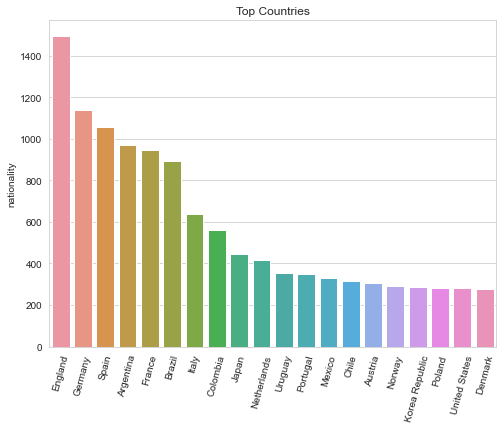

In [32]:
#bar graph of top 20 countries with maximum number of players
top_countries = dataraw_df.nationality.value_counts().head(20)
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.title("Top Countries")
sns.barplot(top_countries.index, top_countries);

Now, let's have a look at the clubs from which we can find players in Fifa 21, or the clubs that are available in Fifa 21.

In [33]:
#number of different clubs available in Fifa 21
no_of_clubs = dataraw_df.team.nunique()
no_of_clubs

713

In [34]:
#The clubs which has maximum number of players in Fifa 21.
top_clubs = dataraw_df.team.value_counts().head(50)
top_clubs

Free Agents                    211
River Plate                     35
RC Celta                        33
Tottenham Hotspur               33
FC Augsburg                     33
Fortuna Düsseldorf              33
Olympique Lyonnais              33
Villarreal CF                   33
Everton                         33
Atlético Madrid                 33
AFC Bournemouth                 33
FC Barcelona                    33
Valencia CF                     33
Real Betis                      33
Real Madrid                     33
Liverpool                       33
R. Valladolid CF                33
Arsenal                         33
Leicester City                  33
1. FSV Mainz 05                 33
Newcastle United                33
RCD Espanyol                    33
AS Monaco Football Club SA      33
Manchester United               33
Chelsea                         32
D. Alavés                       32
Watford                         32
SC Paderborn 07                 32
LOSC Lille          

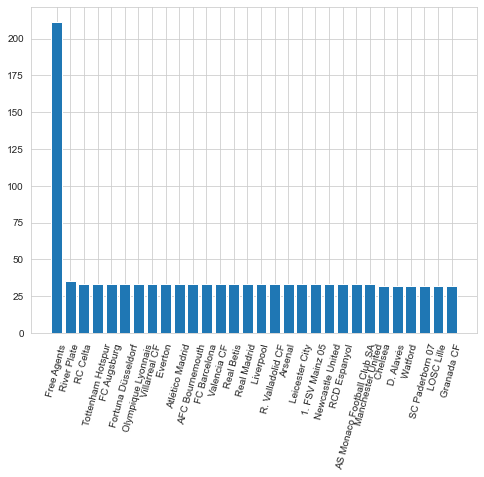

In [35]:
#bar graph of the top 30 clubs with maximum players.
top_clubss = dataraw_df.team.value_counts().head(30)
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)

plt.bar(top_clubss.index, top_clubss);

Let's work with age category now.

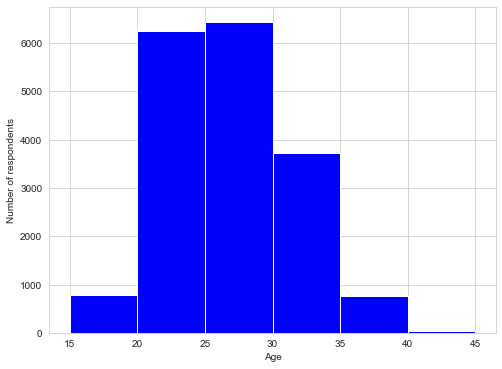

In [36]:
#histogram depicting number of players in different age groups
plt.figure(figsize=(8, 6))

plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(dataraw_df.age, bins=np.arange(15,50,5), color='blue');

Let's group the players of the top 3 age categories. So that we can find the top 5 players in each of the top 3 age categories.

In [37]:
#players of age 21 to 25
age2125_df = dataraw_df[ (dataraw_df.age == 21) | 
                         (dataraw_df.age == 22) | 
                         (dataraw_df.age == 23) |
                         (dataraw_df.age == 24) |
                         (dataraw_df.age == 25)
                         
                        ]
age2125_df

,player_id,name,nationality,position,overall,age,hits,potential,team
13,231747,Kylian Mbappé,France,ST|RW|LW,89,21,222,95,Paris Saint-Germain
23,202652,Raheem Sterling,England,RW|LW,88,25,61,90,Manchester City
35,218667,Bernardo Silva,Portugal,CM|CAM|RW,87,25,53,90,Manchester City
36,212622,Joshua Kimmich,Germany,RB|CDM|CM,87,25,82,90,FC Bayern München
56,232363,Milan Škriniar,Slovakia,CB,86,25,62,90,Inter
...,...,...,...,...,...,...,...,...,...
17966,256417,Mads Sande,Norway,CM,56,22,0,63,FK Haugesund
17975,256101,Patrick Seagrist,United States,LB,56,22,0,66,New York Red Bulls
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional


In [38]:
#players of age 26 to 30 
age2630_df = dataraw_df[(dataraw_df.age == 26) | 
                         (dataraw_df.age == 27) | 
                         (dataraw_df.age == 28) | 
                         (dataraw_df.age == 29) |
                         (dataraw_df.age == 30) 
                         
                        ]
age2630_df

,player_id,name,nationality,position,overall,age,hits,potential,team
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
5,192985,Kevin De Bruyne,Belgium,CM|CAM,91,29,119,91,Manchester City
7,183277,Eden Hazard,Belgium,ST|LW,91,29,66,91,Real Madrid
...,...,...,...,...,...,...,...,...,...
17954,203372,Alex Cooper,Scotland,LB|LM|CM,57,28,0,57,Sligo Rovers
17955,199007,Mark McGinley,Republic of Ireland,GK,57,30,0,58,Finn Harps
17956,198487,Luka Mijaljevic,Sweden,ST,57,29,0,57,AFC Eskilstuna
17957,198485,Shane McEleney,Republic of Ireland,CB,57,29,0,58,Finn Harps


In [39]:
#players of age 31 to 36
age3135_df = dataraw_df[(dataraw_df.age == 31) | 
                         (dataraw_df.age == 32) | 
                         (dataraw_df.age == 33) | 
                         (dataraw_df.age == 34) |
                         (dataraw_df.age == 35) 
                         
                        ]
age3135_df

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
6,188545,Robert Lewandowski,Poland,ST,91,31,89,91,FC Bayern München
12,153079,Sergio Agüero,Argentina,ST,90,32,50,90,Manchester City
18,177003,Luka Modric,Croatia,CM,89,34,31,89,Real Madrid
...,...,...,...,...,...,...,...,...,...
17928,224670,Qiao Wei,China PR,CB,57,33,0,57,Shenzen FC
17930,224628,Wang Dalong,China PR,CB,57,31,0,57,Shenzen FC
17942,222182,Zhu Xiaogang,China PR,CDM|CM,57,32,0,57,Dalian YiFang FC
17958,182352,Li Benjian,China PR,LM|CM|CAM,57,34,1,57,Henan Jianye FC


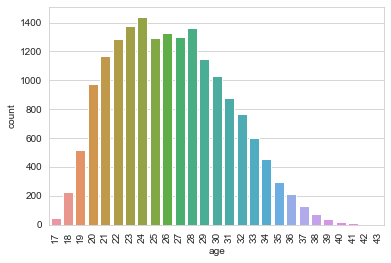

In [40]:
#countplot denoting the number of players in each age  
sns.countplot(x=dataraw_df.age)
plt.xticks(rotation=90);


C:\Users\shimu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


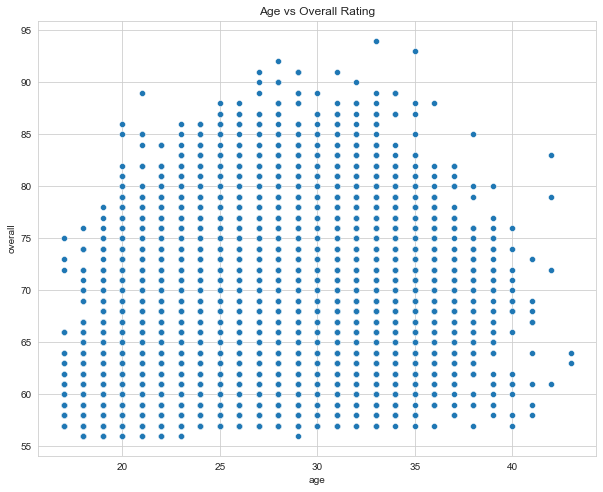

In [41]:
#Scatterplot of overall vs age 
plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')

sns.scatterplot(dataraw_df.age, dataraw_df.overall);



###### From the scatterplot we can observe many things like : 
1. There are no players under age 20 who have a rating of more than 80. 
2. Players with 90 + rating are in the age goup of 27 to 35. 
3. Between age 20 to 40 and rating 55 to 85 there is an almost same overall distribution of players.

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sayakpm3/fifa-21-players-data-analysis-in-python1" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1


'https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1'

## Asking and Answering Questions

Let's ask some specific questions related to Fifa 21, and try to answer them using data frame operations and interesting visualizations.

### Q: Who are the top 10 players with the highest overall rating in Fifa 21 ?

The original dataset is sorted in descending order of overall rating, so to find the top 10 players with highest overall rating we don't require to sort the dataset again and simply use the .head() method to find the top 10 players.

In [44]:
top10_df = dataraw_df[['name', 'age', 'overall']]
top10_df.head(10)

,name,age,overall
0,Lionel Messi,33,94
1,Cristiano Ronaldo,35,93
2,Neymar Jr,28,92
3,Virgil van Dijk,29,91
4,Jan Oblak,27,91
5,Kevin De Bruyne,29,91
6,Robert Lewandowski,31,91
7,Eden Hazard,29,91
8,Alisson,27,90
9,Mohamed Salah,28,90


There we go according to the overall rating Lionel Messi is at the top with a of 94 rating and Mohamed Salah is 10th with a rating of 90 in Fifa 21.

### Q: Who are the top 5 players having the highest rating in each category (forwards, midfielders, defenders, goalkeepers) in Fifa 21 ?

We will use the already created dataframes like forwards_df & midfielders_df, alongwith .head() method to get the top 10 players of each category.

###### Forwards

In [45]:
top10forward_df = forwards_df[['name', 'age', 'overall']]
top10forward_df.head(10)

,name,age,overall
0,Lionel Messi,33,94
1,Cristiano Ronaldo,35,93
2,Neymar Jr,28,92
6,Robert Lewandowski,31,91
7,Eden Hazard,29,91
9,Mohamed Salah,28,90
10,Sadio Mané,28,90
12,Sergio Agüero,32,90
13,Kylian Mbappé,21,89
15,Harry Kane,27,89


From the above dataframe we can observe that, 'Lionel Messi' is ranked as the best forward, followed by 'Cristiano Ronaldo' and 'Neymar Jr' as the 2nd and 3rd best respectively, while 'Harry Kane' is ranked as the 10th best among the forwards in Fifa 21.

###### Midfielders

In [46]:
top10midfielders_df = midfielders_df[['name', 'age', 'overall']]
top10midfielders_df.head(10)

,name,age,overall
5,Kevin De Bruyne,29,91
14,N'Golo Kanté,29,89
17,Toni Kroos,30,89
18,Luka Modric,34,89
26,Casemiro,28,88
29,Sergio Busquets,32,88
40,Marco Verratti,27,87
41,Paul Pogba,27,87
44,Christian Eriksen,28,87
45,Parejo,31,87


From the above dataframe we can observe that, 'Kevin De Bruyne' is ranked as the best midfielder, followed by 'N'Golo Kanté' and 'Toni Kroos' as the 2nd and 3rd best respectively, while 'Parejo' is ranked as the 10th best among the midfielders in Fifa 21.

###### Defenders

In [47]:
top10defenders_df = defenders_df[['name', 'age', 'overall']]
top10defenders_df.head(10)

,name,age,overall
3,Virgil van Dijk,29,91
21,Sergio Ramos,34,89
25,Kalidou Koulibaly,29,88
33,Piqué,33,88
34,Giorgio Chiellini,35,88
37,Aymeric Laporte,26,87
49,Diego Godín,34,87
50,Mats Hummels,31,87
54,Thiago Silva,35,87
56,Milan Škriniar,25,86


From the above dataframe we can observe that, 'Virgil van Dijk' is ranked as the best defender, followed by 'Sergio Ramos' and 'Kalidou Koulibaly' as the 2nd and 3rd best respectively, while 'Milan Škriniar' is ranked as the 10th best among the defenders in Fifa 21.

###### Goalkeepers

In [48]:
top10gks_df = gk_df[['name', 'age', 'overall']]
top10gks_df.head(10)

,name,age,overall
4,Jan Oblak,27,91
8,Alisson,27,90
11,Marc-André ter Stegen,28,90
20,Manuel Neuer,34,89
22,Ederson,26,88
27,De Gea,29,88
28,Thibaut Courtois,28,88
32,Samir Handanovic,36,88
42,Keylor Navas,33,87
47,Wojciech Szczesny,30,87


From the above dataframe we can observe that, 'Jan Oblak' is ranked as the best goalkeeper, followed by 'Alisson' and 'Marc-André ter Stegen' as the 2nd and 3rd best respectively, while 'Wojciech Szczesny' is ranked as the 10th best among the goalkeepers in Fifa 21.

### Q: What is the total number of different countries from which Fifa 21 players are selected ? Which are the top 10 countries to have most number of players in Fifa 21 ? 

To find the number of different countries we will use the method .nunique(). For finding top 10 countries with highest player participation in Fifa 21 we will use the method .value_counts(). We will use a bar graph for better visualisation.

In [49]:
no_of_countries = dataraw_df.nationality.nunique()
no_of_countries

162

So, we can see that there are a total of 162 different countries from which we can find players in Fifa 21. 

In [50]:
top_countries = dataraw_df.nationality.value_counts().head(10)
top_countries

England        1496
Germany        1138
Spain          1055
Argentina       970
France          948
Brazil          894
Italy           637
Colombia        561
Japan           448
Netherlands     418
Name: nationality, dtype: int64

C:\Users\shimu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


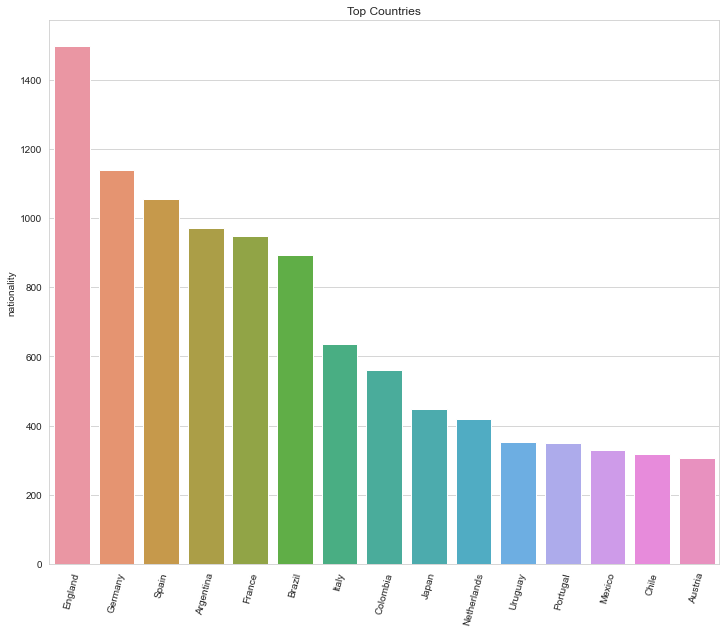

In [51]:
top_countries = dataraw_df.nationality.value_counts().head(15)
plt.figure(figsize=(12,10))
plt.xticks(rotation=75)
plt.title("Top Countries")
sns.barplot(top_countries.index, top_countries);

From the above graph we can see that England is the country with highest number of players in Fifa 21, followed by Germany and Spain.

Now, we can also check if there is any player from our country in Fifa 21.
So, I am an Indian. I will be checking if any player of India is there in Fifa 21. And if there is Indian players present in Fifa 21, we will also find out who they are.

In [52]:
for a in dataraw_df.nationality:
    if a == 'India':
        print("Indian Players are there in Fifa 21.")
        break

else: 
    print("Indian Players are not included in Fifa 21.")

    

Indian Players are there in Fifa 21.


So, we found that Indian Players are present in Fifa 21. Now, we can find out who are the players.

In [53]:
indian_df = dataraw_df[(dataraw_df.nationality == 'India') ]
indian_df

,player_id,name,nationality,position,overall,age,hits,potential,team
11885,251742,Gajodara Chatterjee,India,GK,64,35,1,64,Free Agents
13068,251728,Bhadrashree Raj,India,RB,63,32,1,63,Free Agents
13069,251723,Prakul Bhatt,India,ST,63,35,3,63,Free Agents
14135,251736,Anvit Swaminathan,India,LM|CAM,62,28,2,62,Free Agents
14136,251727,Hantidev Bhandari,India,RM|LM,62,31,0,62,Free Agents
14137,251722,Abhimoda Chakraborty,India,CB,62,34,0,62,Free Agents
15058,251729,Devindra Pillai,India,RM|RW,61,32,0,61,Free Agents
15824,251747,Anuvinda Khurana,India,CB,60,27,2,62,Free Agents
15825,251743,Adit Ginti,India,LB|LM,60,26,3,62,Free Agents
15826,251732,Remil Nadkarni,India,CAM|CF,60,34,1,60,Free Agents


In [54]:
indian_df.name.count()

25

So, we can see that there are 25 Indian Players in Fifa 21 and all of them are Free Agents, that is they do not represent any club.

### Q: What is the total number of different clubs from which Fifa 21 players are selected ? Which are the top 10 clubs to have most number of players in Fifa 21 ? 

To find the number of different clubs present in Fifa 21 we will use the .nunique() method once again.
For finding the clubs having maximum player we will use the .value_counts method. For better visualistaion we will also plot a bar graph.

In [55]:
no_of_clubs = dataraw_df.team.nunique()
no_of_clubs

713

In [56]:
top_clubs = dataraw_df.team.value_counts().head(50)
top_clubs

Free Agents                    211
River Plate                     35
RC Celta                        33
Tottenham Hotspur               33
FC Augsburg                     33
Fortuna Düsseldorf              33
Olympique Lyonnais              33
Villarreal CF                   33
Everton                         33
Atlético Madrid                 33
AFC Bournemouth                 33
FC Barcelona                    33
Valencia CF                     33
Real Betis                      33
Real Madrid                     33
Liverpool                       33
R. Valladolid CF                33
Arsenal                         33
Leicester City                  33
1. FSV Mainz 05                 33
Newcastle United                33
RCD Espanyol                    33
AS Monaco Football Club SA      33
Manchester United               33
Chelsea                         32
D. Alavés                       32
Watford                         32
SC Paderborn 07                 32
LOSC Lille          

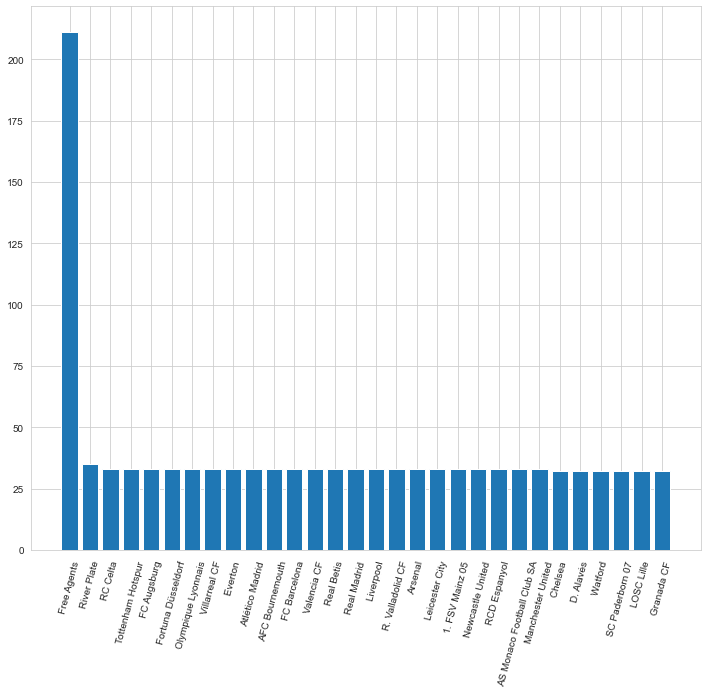

In [57]:
top_clubss = dataraw_df.team.value_counts().head(30)
plt.figure(figsize=(12,10))
plt.xticks(rotation=75)

plt.bar(top_clubss.index, top_clubss);

So, there are 713 different clubs in Fifa 21. There are 211 Free Agents in Fifa 21. Rest of the players represents a club and in the top 50 category we can see that most of the clubs has on an average 32 players in their teams. From the bar graph also we can visualise that all the teams other than the Free Agents have more or less the same bars. Although River Plate is the team with highest number of players that is 35

### Q: What are the age groups with maximum number of players in Fifa 21?

We will plot a histogram depicting the number of players in different age groups. From the histogram we will be get to know which are the age groups with maximum players. 

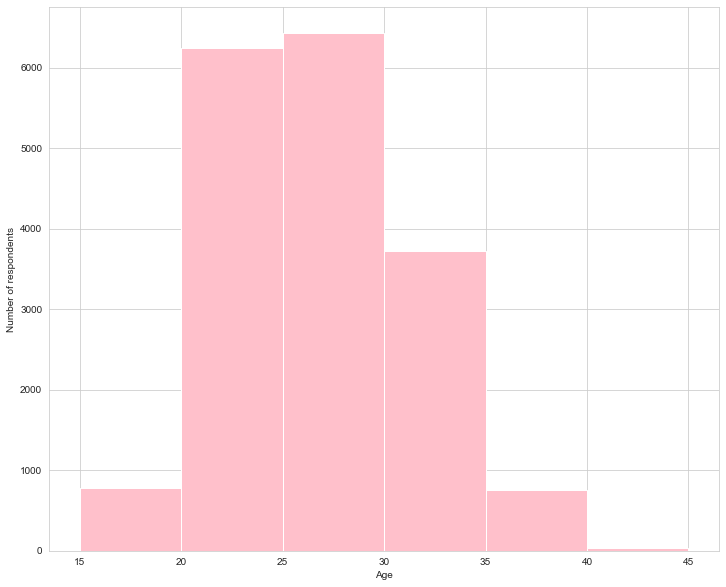

In [58]:
plt.figure(figsize=(12, 10))

plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(dataraw_df.age, bins=np.arange(15,50,5), color='pink');

The maximum number of players falls in the age group 25 to 30, followed by 20 to 25 and 30 to 35.

### Q: Who are the top 5 players in age groups with maximum players? 

So, we need to find the top 5 players in the age groups 21-25, 26-30, 31-35. To find the top 10 players we have to use the dataframes containing the players of different age groups and the .head() method.

###### Age Group 21 to 25.

In [59]:
age2125_df.head(5)

,player_id,name,nationality,position,overall,age,hits,potential,team
13,231747,Kylian Mbappé,France,ST|RW|LW,89,21,222,95,Paris Saint-Germain
23,202652,Raheem Sterling,England,RW|LW,88,25,61,90,Manchester City
35,218667,Bernardo Silva,Portugal,CM|CAM|RW,87,25,53,90,Manchester City
36,212622,Joshua Kimmich,Germany,RB|CDM|CM,87,25,82,90,FC Bayern München
56,232363,Milan Škriniar,Slovakia,CB,86,25,62,90,Inter


From the above dataframe we can observe that in the age group 21 to 25, 'Kylian Mbappé' is ranked 1st, followed by 'Raheem Sterling' and 'Bernardo Silva'.

###### Age Group 26 to 30.

In [60]:
age2630_df.head(5)

,player_id,name,nationality,position,overall,age,hits,potential,team
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
5,192985,Kevin De Bruyne,Belgium,CM|CAM,91,29,119,91,Manchester City
7,183277,Eden Hazard,Belgium,ST|LW,91,29,66,91,Real Madrid


From the above dataframe we can observe that in the age group 21 to 25, 'Kylian Mbappé' is ranked 1st, followed by 'Raheem Sterling' and 'Bernardo Silva'.

###### Age Group 31 to 35.

In [61]:
age3135_df.head(5)

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
6,188545,Robert Lewandowski,Poland,ST,91,31,89,91,FC Bayern München
12,153079,Sergio Agüero,Argentina,ST,90,32,50,90,Manchester City
18,177003,Luka Modric,Croatia,CM,89,34,31,89,Real Madrid


From the above dataframe we can observe that in the age group 21 to 25, 'Kylian Mbappé' is ranked 1st, followed by 'Raheem Sterling' and 'Bernardo Silva'.

### Q: What are the ages in which maximum players are present?

Let's see how many players are there in each of the different age. For finding this we will use a count plot.

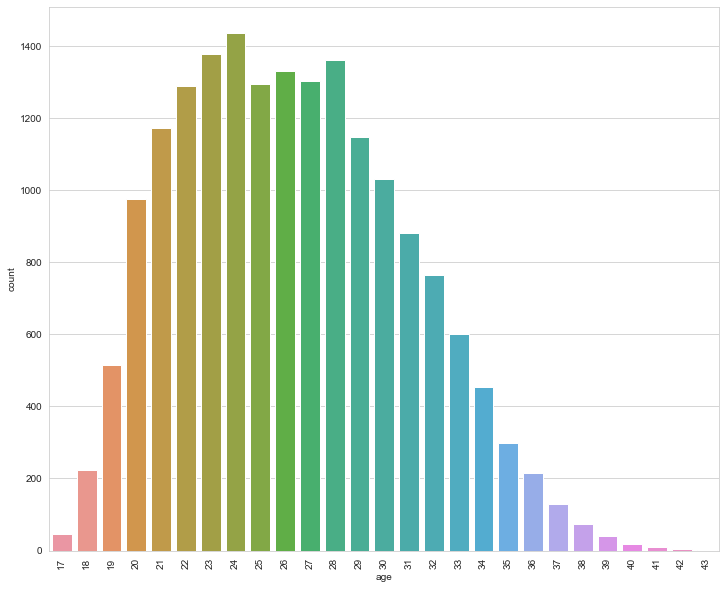

In [62]:
plt.figure(figsize=(12, 10))
sns.countplot(x=dataraw_df.age)
plt.xticks(rotation=90);

From the above graph we can conclude that there is maximum players of the age 24 followed by ages 23, 28 and 26. There are more than 1400 players of 24 years of age.

In [63]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Inferences and Conclusion


We've drawn many interesting conclusions from this dataset and analysis. Some of them are - 

* There are 17981 players in Fifa 21.
* There are 162 different countries from where there are players in Fifa 21. Out of which there are 3 countries with more than 1000 players.
* There are 1496 players from England, 1138 players from Germany and 1055 players from Spain.
* There are around 713 clubs with each club having around 30 players.
* Maximum number of players falls in the age group 25 to 30.
* More than 1400 players are of the age 24.
* Highest overall rating in Fifa 21 is 94. Lionel Messi is the highest rated player with 94 overall rating.

In [65]:
import jovian

In [66]:
jovian.commit(project='fifa_21_players_data_analysis_in_python1')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sayakpm3/fifa-21-players-data-analysis-in-python1" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1


'https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1'

## References and Future Work


From this dataset of Fifa 21 we can further do many researches and analysis.Here are some ideas for further exploration:

*  We can analyze more on the countries having the maximum players. As to what is the favourite sports in that country. The population of the country. The sporting infrastructure and facilities that favours football. The history of the country with football.
* We can find out the teams which have the most players having overall rating of more than 90, more than 80 and so on. We can find out how many players with more than 90 rating are there in the top teams of the world like Real Madrid, Barcelona, Juventus, PSG, Man United, Man City, etc.
* We can also analyze the data of top players individually. Like we can analyze the data of Lionel Messi and Cristiano Ronaldo to understand why they are rated so much higher than the others. We can find out there achievements and records, which can help us understand why they are so highly rated. Although for that purpose we will require different dataset with data of that individual player.


References:

* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [67]:
import jovian

In [68]:
jovian.commit(project='fifa_21_players_data_analysis_in_python1')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sayakpm3/fifa-21-players-data-analysis-in-python1" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1


'https://jovian.ml/sayakpm3/fifa-21-players-data-analysis-in-python1'